# Homework 6
- Student: Aleksandra Kocot
 - [Git Hub page with the Homework Week6 questions](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/06-trees/homework.md)

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

The goal of this homework is to create a regression model for predicting housing prices (column <b>'median_house_value'</b>).

### Preparing the dataset
For this homework, we only want to use a subset of data. This is the same subset we used in homework #2. But in contrast to homework #2, we are going to use all columns of the dataset.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

##### Preparation:

Fill missing values with zeros.
Apply the log transform to median_house_value.
Do train/validation/test split with 60%/20%/20% distribution.
Use the train_test_split function and set the random_state parameter to 1.
Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import xgboost as xgb

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape

(20640, 10)

In [5]:
df = df.loc[df.ocean_proximity.isin(['<1H OCEAN','INLAND'])]

In [6]:
df.shape

(15687, 10)

In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df = df.fillna(0)

In [9]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
df_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train["median_house_value"] 
del df_val["median_house_value"]
del df_test["median_house_value"] 

In [12]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-120.25,37.93,13.0,493.0,76.0,196.0,68.0,3.3750,INLAND
1,-118.40,34.00,10.0,1526.0,339.0,705.0,268.0,5.8083,<1H OCEAN
2,-121.67,38.85,46.0,645.0,131.0,410.0,122.0,1.7417,INLAND
3,-118.14,33.88,24.0,3305.0,982.0,2085.0,881.0,2.6641,<1H OCEAN
4,-118.11,33.92,34.0,1414.0,263.0,983.0,264.0,4.1767,<1H OCEAN


##### Turn the dataframes into matrices

In [13]:
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=True)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [14]:
X_train

<9411x10 sparse matrix of type '<class 'numpy.float64'>'
	with 84699 stored elements in Compressed Sparse Row format>

## Question 1
Let's train a decision tree regressor to predict the median_house_value variable.

Train a model with max_depth=1.<br>
Which feature is used for splitting the data?
- <b>ocean_proximity</b>
- total_rooms
- latitude
- population

In [14]:
model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [15]:
print(export_text(model, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



## Question 2
Train a random forest model with these parameters:

n_estimators=10
random_state=1
n_jobs=-1 (optional - to make training faster)<br>
What's the RMSE of this model on validation?
- 0.045
- <b>0.245</b>
- 0.545
- 0.845

In [19]:
model_rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
model_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [24]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model_rf.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(round(rmse,3))

0.245


## Question 3
Now let's experiment with the n_estimators parameter

Try different values of this parameter from 10 to 200 with step 10.
Set random_state to 1.
Evaluate the model on the validation dataset.<br>
After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for retrieving the answer.
- 10
- 25
- 50
- <b>160</b>

In [29]:
estimators = np.arange(10,210,10)
estimators

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

In [30]:
res = []
for e in estimators:
    model_rf = RandomForestRegressor(n_estimators=e, random_state=1, n_jobs=-1)
    model_rf.fit(X_train, y_train)
    
    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_pred = model_rf.predict(X_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    res.append((e,round(rmse,3)))

In [37]:
pd.DataFrame(res,columns=["n_estimators","rmse"]).set_index("n_estimators").style.background_gradient(axis=0)  

,rmse
n_estimators,
10,0.245000
20,0.238000
30,0.237000
40,0.235000
50,0.235000
60,0.235000
70,0.234000
80,0.235000
90,0.234000


## Question 4
Let's select the best max_depth:

Try different values of max_depth: [10, 15, 20, 25]
For each of these values,
try different values of n_estimators from 10 till 200 (with step 10)
calculate the mean RMSE
Fix the random seed: random_state=1<br>
What's the best max_depth, using the mean RMSE?
- 10
- 15
- 20
- <b>25</b>

In [38]:
max_depths = [10,15,20,25]
res2 = []
for md in max_depths:
    for e in estimators:
        model_rf = RandomForestRegressor(n_estimators=e, max_depth=md, random_state=1, n_jobs=-1)
        model_rf.fit(X_train, y_train)
        
        val_dict = df_val.to_dict(orient='records')
        X_val = dv.transform(val_dict)
        y_pred = model_rf.predict(X_val)
        
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        res2.append((md,e,round(rmse,5)))

In [54]:
res2[:5]

[(10, 10, 0.25068),
 (10, 20, 0.24746),
 (10, 30, 0.24626),
 (10, 40, 0.24503),
 (10, 50, 0.24543)]

In [50]:
res_df = pd.DataFrame(res2,columns=["max_depth","n_estimator","rmse"])

In [52]:
res_df.pivot(index='n_estimator', columns='max_depth', values='rmse').style.background_gradient(axis=0)  

max_depth,10,15,20,25
n_estimator,,,,
10,0.250680,0.245730,0.245310,0.245080
20,0.247460,0.239530,0.238980,0.238660
30,0.246260,0.237810,0.237110,0.236450
40,0.245030,0.235900,0.235520,0.234940
50,0.245430,0.235930,0.235130,0.234590
60,0.245220,0.235620,0.234790,0.234260
70,0.245290,0.235540,0.234700,0.234140
80,0.245540,0.235770,0.234910,0.234300
90,0.245450,0.235450,0.234810,0.234300


In [60]:
res_df.pivot(index='n_estimator', columns='max_depth', values='rmse').mean().sort_values(ascending=True)

max_depth
25    0.234897
20    0.235283
15    0.235938
10    0.245440
dtype: float64

## Question 5
We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parameters:
n_estimators=10,
max_depth=20,
random_state=1,
n_jobs=-1 (optional)
Get the feature importance information from this model<br>
What's the most important feature (among these 4)?
- total_rooms
- <b>median_income</b>
- total_bedrooms
- longitude

In [ ]:
model_rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
model_rf.fit(X_train, y_train)

In [81]:
importances = model_rf.feature_importances_
importances

array([0.01493345, 0.03200421, 0.10066265, 0.08660514, 0.33661832,
       0.22586047, 0.13841961, 0.02743477, 0.01580507, 0.02165631])

In [84]:
feature_names = dv.feature_names_
feature_names

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [85]:
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_], axis=0)
std

array([0.00250049, 0.00280063, 0.00691996, 0.00623897, 0.00788946,
       0.17695737, 0.17686491, 0.00342338, 0.00253456, 0.00293455])

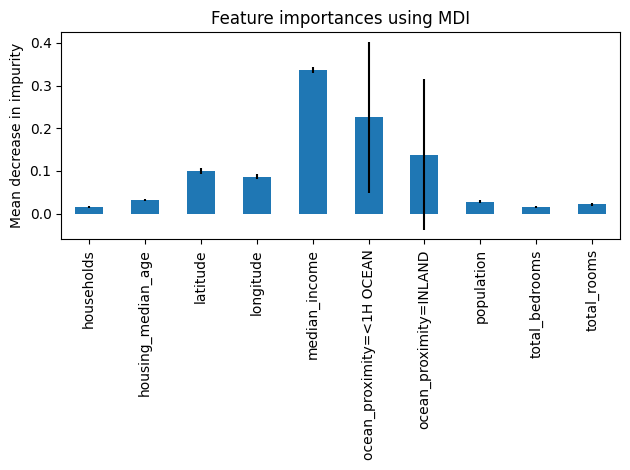

In [86]:
fig, ax = plt.subplots()
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Question 6
Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

Install XGBoost
Create DMatrix for train and validation
Create a watchlist
Train a model with these parameters for 100 rounds:

xgb_params = {

    'eta': 0.3, 

    'max_depth': 6,
    
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    
    'nthread': 8,
    
    'seed': 1,
    
    'verbosity': 1,
}


Now change eta from 0.3 to 0.1.
<br>
Which eta leads to the best RMSE score on the validation dataset?
- <b>0.3</b>
- 0.1
- Both give equal value

In [22]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [23]:
features = dv.feature_names_
features = [f.replace("<","less") for f in features]
features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=less1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [24]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [32]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [34]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

In [37]:
model = xgb.train(
    xgb_params, 
    dtrain,
    evals=watchlist,
    verbose_eval=5,#print every 5 step
    num_boost_round=100)

[0]	train-rmse:0.44350	val-rmse:0.44250
[5]	train-rmse:0.25338	val-rmse:0.27463
[10]	train-rmse:0.21444	val-rmse:0.25179
[15]	train-rmse:0.19858	val-rmse:0.24522
[20]	train-rmse:0.18524	val-rmse:0.23978
[25]	train-rmse:0.17757	val-rmse:0.23830
[30]	train-rmse:0.16888	val-rmse:0.23570
[35]	train-rmse:0.16113	val-rmse:0.23416
[40]	train-rmse:0.15542	val-rmse:0.23318
[45]	train-rmse:0.14941	val-rmse:0.23190
[50]	train-rmse:0.14536	val-rmse:0.23225
[55]	train-rmse:0.14150	val-rmse:0.23197
[60]	train-rmse:0.13719	val-rmse:0.23139
[65]	train-rmse:0.13259	val-rmse:0.23158
[70]	train-rmse:0.12943	val-rmse:0.23068
[75]	train-rmse:0.12555	val-rmse:0.23039
[80]	train-rmse:0.12192	val-rmse:0.22886
[85]	train-rmse:0.11854	val-rmse:0.22888
[90]	train-rmse:0.11496	val-rmse:0.22861
[95]	train-rmse:0.11211	val-rmse:0.22908
[99]	train-rmse:0.10989	val-rmse:0.22862


In [38]:
y_pred = model.predict(dval)

In [39]:
y_pred

array([12.246578 , 12.132448 , 11.651083 , ..., 12.083826 , 11.0586195,
       11.775838 ], dtype=float32)

In [41]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

0.228623199980106

##### Second model 'eta': 0.1

In [42]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

In [43]:
model = xgb.train(
    xgb_params, 
    dtrain,
    evals=watchlist,
    verbose_eval=5,#print every 5 step
    num_boost_round=100)

[0]	train-rmse:0.52449	val-rmse:0.52045
[5]	train-rmse:0.37822	val-rmse:0.38151
[10]	train-rmse:0.30326	val-rmse:0.31427
[15]	train-rmse:0.26538	val-rmse:0.28380
[20]	train-rmse:0.24512	val-rmse:0.26882
[25]	train-rmse:0.23026	val-rmse:0.25997
[30]	train-rmse:0.21887	val-rmse:0.25266
[35]	train-rmse:0.21020	val-rmse:0.24826
[40]	train-rmse:0.20392	val-rmse:0.24539
[45]	train-rmse:0.19814	val-rmse:0.24293
[50]	train-rmse:0.19215	val-rmse:0.24020
[55]	train-rmse:0.18809	val-rmse:0.23878
[60]	train-rmse:0.18457	val-rmse:0.23791
[65]	train-rmse:0.18063	val-rmse:0.23698
[70]	train-rmse:0.17741	val-rmse:0.23622
[75]	train-rmse:0.17468	val-rmse:0.23510
[80]	train-rmse:0.17242	val-rmse:0.23453
[85]	train-rmse:0.17014	val-rmse:0.23404
[90]	train-rmse:0.16797	val-rmse:0.23332
[95]	train-rmse:0.16562	val-rmse:0.23276
[99]	train-rmse:0.16323	val-rmse:0.23209


In [44]:
y_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

0.23208927121609343